In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL #Pillow to handle images
import tensorflow as tf

2023-02-26 22:20:23.059394: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-26 22:20:25.671387: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-26 22:20:26.452384: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-26 22:20:26.452416: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" #tgz = tar ball (just like zip file)
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

In [3]:
data_dir

'/home/salman/.keras/datasets/flower_photos'

In [4]:
valid_size = .2

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler
import time

In [6]:
# Normalize the test and train sets with torchvision
train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(30),
    transforms.Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

valid_transforms = transforms.Compose([transforms.Resize((224,224)),
                                       transforms.ToTensor(),
                                       transforms.Normalize(
                                       mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                          ])

In [7]:
NUM_EPOCHS = 2
lr = 0.001
batch_size = 4
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
# ImageFolder class to load the train and test images
train_data = datasets.ImageFolder(data_dir, transform=train_transforms)
valid_data = datasets.ImageFolder(data_dir, transform=valid_transforms)

In [9]:
train_data

Dataset ImageFolder
    Number of datapoints: 3670
    Root location: /home/salman/.keras/datasets/flower_photos
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [10]:
valid_data

Dataset ImageFolder
    Number of datapoints: 3670
    Root location: /home/salman/.keras/datasets/flower_photos
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [11]:
train_data.classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [12]:
#number of train images
num_train = len(train_data)
indices = list(range(num_train))

In [13]:
num_train

3670

In [14]:
# Split = 20% of train images
split = int(np.floor(valid_size * num_train))
# Shuffle indices of train images
np.random.shuffle(indices)

In [15]:
print(split)

734


In [16]:
#subset indices for test and train
train_idx, valid_idx = indices[split:], indices[:split]

In [17]:
len(train_idx)

2936

In [18]:
len(valid_idx)

734

In [19]:
#samples elements randomly from a given list os indices
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [21]:
# Batch and load the images
train_loader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(valid_data, sampler=valid_sampler, batch_size=batch_size)

In [22]:
examples = iter(train_loader)
samples, labels = next(examples)
samples.shape

torch.Size([4, 3, 224, 224])

In [23]:
labels.shape

torch.Size([4])

In [24]:
labels

tensor([4, 4, 3, 4])

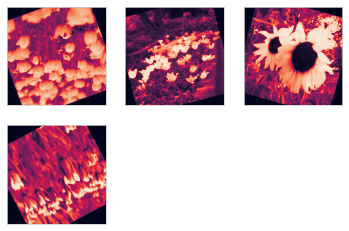

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
for i in range(4):
    plt.subplot(2,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(samples[i][0])
plt.show()

In [26]:
def imshow(img,title):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(25,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(title)
    plt.show()

In [27]:
sample = samples[:4]
label = labels[:4]
out = torchvision.utils.make_grid(sample)

In [28]:
class_name = train_data.classes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


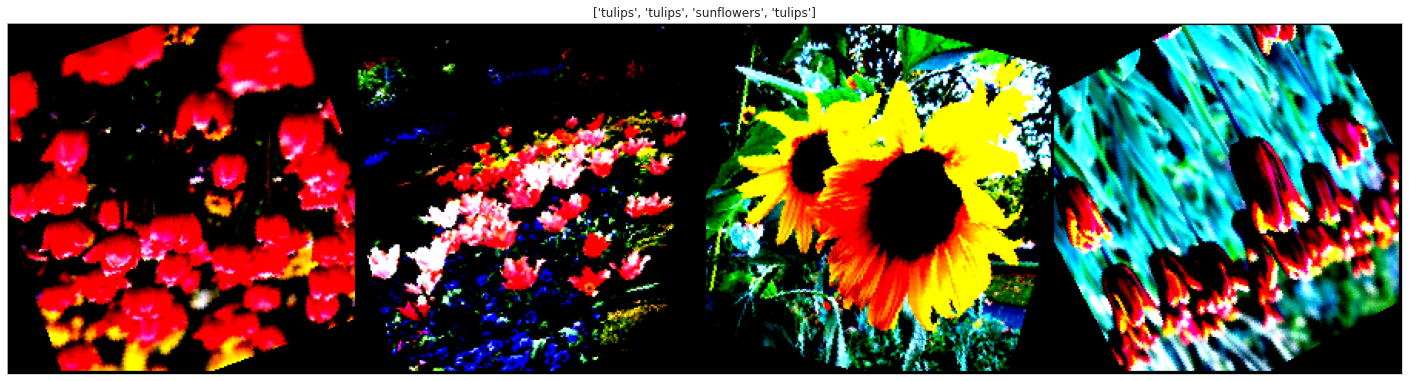

In [29]:
imshow(out,title=[class_name[x] for x in label])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


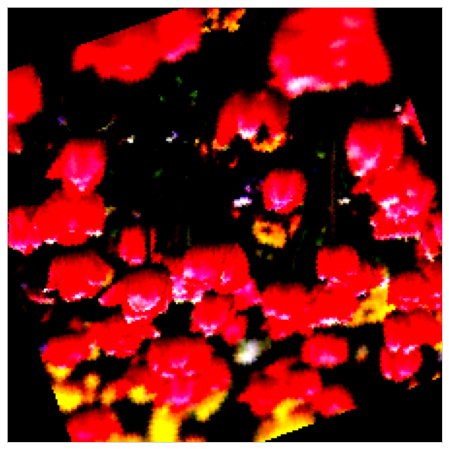

In [30]:
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.title(title)
    plt.show()
imshow(samples[0])

In [31]:
model = nn.Sequential(nn.Conv2d(3,32,kernel_size=3,stride=1,padding=1),
                     nn.ReLU(),
                     nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
                     nn.ReLU(),
                     nn.MaxPool2d(2,2),
                     nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
                     nn.ReLU(),
                     nn.Conv2d(128,128,kernel_size=3,stride=1,padding=1),
                     nn.ReLU(),
                     nn.MaxPool2d(2,2),
                     nn.Conv2d(128,256,kernel_size=3,stride=1,padding=1),
                     nn.ReLU(),
                     nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1),
                     nn.ReLU(),
                     nn.MaxPool2d(2,2),
                     nn.Flatten(),
                     nn.Linear(256*28*28,512),
                     nn.ReLU(),
                     nn.Linear(512,256),
                     nn.ReLU(),
                     nn.Linear(256,5))

In [32]:
model = model.to(DEVICE)

In [33]:
model

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU()
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU()
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU()
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=200704, out_features=512, bias=True)
  (17): ReLU()
  (18): Linear(in_features=512, out_features=256, bias=True)
  (19): ReLU()
  (20): Linea

In [34]:
#Criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [35]:
'''
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(DEVICE)
        #labels = labels.unsqueeze(1).float()
        print(labels)
        labels = labels.to(DEVICE)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        print(outputs)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if (epoch+1) % 1 == 0:    # 
            print(f'epoch:{epoch+1},loss={running_loss}')
            running_loss = 0.0

print('Finished Training')
'''

"\nfor epoch in range(5):  # loop over the dataset multiple times\n\n    running_loss = 0.0\n    for i, data in enumerate(train_loader, 0):\n        # get the inputs; data is a list of [inputs, labels]\n        inputs, labels = data\n        inputs = inputs.to(DEVICE)\n        #labels = labels.unsqueeze(1).float()\n        print(labels)\n        labels = labels.to(DEVICE)\n\n        # zero the parameter gradients\n        optimizer.zero_grad()\n\n        # forward + backward + optimize\n        outputs = model(inputs)\n        print(outputs)\n        loss = F.cross_entropy(outputs, labels)\n        loss.backward()\n        optimizer.step()\n\n        # print statistics\n        running_loss += loss.item()\n        if (epoch+1) % 1 == 0:    # \n            print(f'epoch:{epoch+1},loss={running_loss}')\n            running_loss = 0.0\n\nprint('Finished Training')\n"

In [36]:
def compute_accuracy(model, data_loader, device):
    correct_pred, num_examples = 0, 0
    for i, (features, targets) in enumerate(data_loader):
            
        features = features.to(device)
        targets = targets.to(device)

        probas = model(features)
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100


start_time = time.time()
for epoch in range(2):
    
    model.train()
    
    for batch_idx, (features, targets) in enumerate(train_loader):
    
        ### PREPARE MINIBATCH
        features = features.to(DEVICE)
        targets = targets.to(DEVICE)
            
        ### FORWARD AND BACK PROP
        probas = model(features)
        cost = F.cross_entropy(probas, targets)
        optimizer.zero_grad()
        
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 4:
            print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} |' 
                   f' Cost: {cost:.4f}')

    # no need to build the computation graph for backprop when computing accuracy
    with torch.set_grad_enabled(False):
        train_acc = compute_accuracy(model, train_loader, device=DEVICE)
        valid_acc = compute_accuracy(model, valid_loader, device=DEVICE)
        print(f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} Train Acc.: {train_acc:.2f}%'
              f' | Validation Acc.: {valid_acc:.2f}%')
        
    elapsed = (time.time() - start_time)/60
    print(f'Time elapsed: {elapsed:.2f} min')
  
elapsed = (time.time() - start_time)/60
print(f'Total Training Time: {elapsed:.2f} min')

Epoch: 001/002 | Batch 000/734 | Cost: 1.6207
Epoch: 001/002 | Batch 004/734 | Cost: 1.6081
Epoch: 001/002 | Batch 008/734 | Cost: 1.6188
Epoch: 001/002 | Batch 012/734 | Cost: 2.2438
Epoch: 001/002 | Batch 016/734 | Cost: 1.6173
Epoch: 001/002 | Batch 020/734 | Cost: 1.6288
Epoch: 001/002 | Batch 024/734 | Cost: 1.5753
Epoch: 001/002 | Batch 028/734 | Cost: 1.5814
Epoch: 001/002 | Batch 032/734 | Cost: 1.6156
Epoch: 001/002 | Batch 036/734 | Cost: 1.6210
Epoch: 001/002 | Batch 040/734 | Cost: 1.6011
Epoch: 001/002 | Batch 044/734 | Cost: 1.6082
Epoch: 001/002 | Batch 048/734 | Cost: 1.5920
Epoch: 001/002 | Batch 052/734 | Cost: 1.6247
Epoch: 001/002 | Batch 056/734 | Cost: 1.5951
Epoch: 001/002 | Batch 060/734 | Cost: 1.5940
Epoch: 001/002 | Batch 064/734 | Cost: 1.5968
Epoch: 001/002 | Batch 068/734 | Cost: 1.6033
Epoch: 001/002 | Batch 072/734 | Cost: 1.6095
Epoch: 001/002 | Batch 076/734 | Cost: 1.5823
Epoch: 001/002 | Batch 080/734 | Cost: 1.5920
Epoch: 001/002 | Batch 084/734 | C

Epoch: 001/002 | Batch 716/734 | Cost: 1.5152
Epoch: 001/002 | Batch 720/734 | Cost: 1.5662
Epoch: 001/002 | Batch 724/734 | Cost: 1.6495
Epoch: 001/002 | Batch 728/734 | Cost: 1.6532
Epoch: 001/002 | Batch 732/734 | Cost: 1.6552
Epoch: 001/002 Train Acc.: 24.49% | Validation Acc.: 24.39%
Time elapsed: 62.46 min
Epoch: 002/002 | Batch 000/734 | Cost: 1.5317
Epoch: 002/002 | Batch 004/734 | Cost: 1.5568
Epoch: 002/002 | Batch 008/734 | Cost: 1.6162
Epoch: 002/002 | Batch 012/734 | Cost: 1.6681
Epoch: 002/002 | Batch 016/734 | Cost: 1.3484
Epoch: 002/002 | Batch 020/734 | Cost: 1.8115
Epoch: 002/002 | Batch 024/734 | Cost: 1.5961
Epoch: 002/002 | Batch 028/734 | Cost: 1.6048
Epoch: 002/002 | Batch 032/734 | Cost: 1.6214
Epoch: 002/002 | Batch 036/734 | Cost: 1.6708
Epoch: 002/002 | Batch 040/734 | Cost: 1.5867
Epoch: 002/002 | Batch 044/734 | Cost: 1.4418
Epoch: 002/002 | Batch 048/734 | Cost: 1.5627
Epoch: 002/002 | Batch 052/734 | Cost: 1.6341
Epoch: 002/002 | Batch 056/734 | Cost: 1.4

Epoch: 002/002 | Batch 688/734 | Cost: 1.6277
Epoch: 002/002 | Batch 692/734 | Cost: 1.6474
Epoch: 002/002 | Batch 696/734 | Cost: 1.5905
Epoch: 002/002 | Batch 700/734 | Cost: 1.6803
Epoch: 002/002 | Batch 704/734 | Cost: 1.5230
Epoch: 002/002 | Batch 708/734 | Cost: 1.6117
Epoch: 002/002 | Batch 712/734 | Cost: 1.6032
Epoch: 002/002 | Batch 716/734 | Cost: 1.5458
Epoch: 002/002 | Batch 720/734 | Cost: 1.6246
Epoch: 002/002 | Batch 724/734 | Cost: 1.6951
Epoch: 002/002 | Batch 728/734 | Cost: 1.5863
Epoch: 002/002 | Batch 732/734 | Cost: 1.5461
Epoch: 002/002 Train Acc.: 24.49% | Validation Acc.: 24.39%
Time elapsed: 141.91 min
Total Training Time: 141.92 min


In [37]:
test = samples[0].view(1,3,224,224)
test = test.to(DEVICE)
out = model(test)

In [38]:
out

tensor([[-0.1414,  0.1542, -0.0717, -0.0773,  0.0276]],
       grad_fn=<AddmmBackward0>)

In [39]:
labels[0]

tensor(4)

In [40]:
torch.max(out,dim=1)[1].item()

1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: tulips , Predicted: dandelion


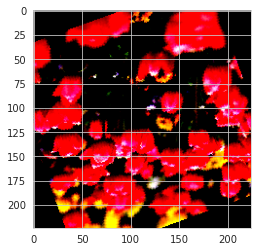

In [41]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = img.unsqueeze(0)
    xb = xb.to(DEVICE)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    preds  = torch.max(yb, dim=1)
    #print(preds[1].item())
    # Retrieve the class label
    return train_data.classes[preds[1].item()]

img, label = samples[0],labels[0]
img = img
label= label.to(DEVICE)
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_data.classes[label], ', Predicted:', predict_image(img, model))